# LANGUAGE COMPETITION

Language competition study using the mean-filed approximation of the Abrams-Strogatz model. The study is performed on a regular lattice, with social interactions between nearest neighbours. 
The Abrams-Strogatz model studies the competition between two languages A and B. The language of each individual will change according to some parameters and his/her interactions: 
1) status or prestige $s$ of the given language     
2) volatility $a$  
3) number of neighbors $\sigma$ speaking the language  

The dynamics of this model is governed by the following equation: 

\begin{equation}
\frac{d \sigma_A}{d t} = ( \sigma_B ) p_{BA} - \sigma_A p_{AB} 
\end{equation}

where $\sigma_A$ ($\sigma_B$) is the proportion of people speaking language $A$ ($B$), $p_{BA}$ reflects the probability to change from language $B$ to language $A$, and $p_{AB}$ is the probability to change from $A$ to $B$: 

\begin{equation}
p_{AB} = (1-s)\sigma_B^a
\end{equation}
\begin{equation}
p_{BA} = s\sigma_A^a
\end{equation}

The parameter $s$ ranges from $0 \le s \le 1$, whereas the parameter $a$ determines the location of the fixed points. We start our model considering a scenario where one of the languages is more prestigious than the other. As we will see, this will led to the extinction of the less renowned language.

## Usual imports and initial condition

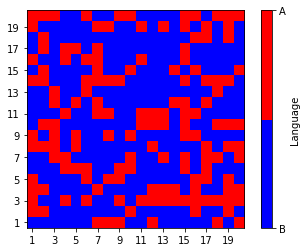

In [1]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt

# INITIAL CONDITION. RANDOMLY DISTRIBUTED LANGUAGES 

# A (mxn) table is created. Each point represents a citizen speaking language A or language B. The initial condition corresponds to
# a randomly distributed scenario with probabilities p( s(i) = A ) = p_a and p( s(i) = B ) = p_b. At the initial point, the two 
#probabilities are equal. 

# First step. Initial parameters and conditions ===========================================================================
    # Size of the sample and language probabilities 
m = 20
n = 20 
pa = .35   #pb = 1.0 - pa

    # Initial condition and representation 
popu = np.ones(shape=(m,n))
mask = np.random.rand(m,n)
popu[(mask <= (1.0 - pa) ) ] = -1 # Value 1 represents language A speakers. Value -1 represents language B speakers 
popu = popu.astype(np.int)
    
    # Definition function rep. This function represents the individuals and his/her language on a lattice
def rep(popu):
    """
    Returns a 2D-representation of the languages spoken by each person. People are represented as the nodes of the lattice. 
    Languages are pictured by a binary selection of colors (blue, red). 

    Inputs:
    popu: 2D-array containing the language spoken by each node. Values inside the array are [-1,1].
    """
    # Figure param definition  
    col = mpl.colors.ListedColormap(['Blue','Red'])
    colbar_tick = np.array([ -1,1 ])

    fig = plt.figure()
    ax  = plt.axes()

    plot = ax.matshow( popu , cmap = col , origin = 'lower' , animated=True)
    ax.xaxis.tick_bottom()
    ax.xaxis.set_major_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MultipleLocator(2))
    ax.xaxis.set_major_formatter(lambda val, pos : r'{}'.format(int(val)+1) )
    ax.yaxis.set_major_formatter(lambda val, pos : r'{}'.format(int(val)+1) )
    fig.colorbar(plot,ax=ax, ticks=colbar_tick , label='Language' ).ax.set_yticklabels(['B', 'A'])
    
    plt.close()  # To avoid an excessive computation cost, the graphical representation of the lattice is not displayed. Only the figure instance is returned. 
    return fig 
    
    # Lattice representation and number of speakers
    # Recovery of the graphical representation. We define a dummy figure to recover a graphical interface 
    # to replace the one that has been destroyed. We will use its manager to display the figure that 
    # we want to show on-screen.
figr = rep(popu)    
dummy = plt.figure()
new_manager = dummy.canvas.manager
new_manager.canvas.figure = figr
figr.set_canvas(new_manager.canvas)
plt.show(figr)

na = np.count_nonzero(popu[popu > 0])
nb = np.count_nonzero(popu[popu < 0])
print('error') if nb != (m*n - na)  else None

## Language dynamics. Change of individual language

Language competition. The language of each individual will change according to parameters $a$, $s$ and the social interactions with his/her neighbors. As mentioned, the probability that determines the change of language is: 

\begin{equation}
p_{AB} = (1-s)\sigma_B^a
\end{equation}
\begin{equation}
p_{BA} = s\sigma_A^a
\end{equation}

where $\sigma$ is computed as follows:

\begin{equation}
\sigma_i= \frac{\text{number speakers language i}}{\text{total number neighbors}}
\end{equation}

In [2]:
# Steps:
# 1) A random node is selected
# 2) The language of each neighbor surrounding the node is computed, counting the number of speakers
# 3) The probability of change is computed. If the probability is larger than a uniformly distributed random number, the language
#    of the selected node is changed
# 4) The process is repeated 

    # Definition function per_bon. We consider a regular lattice with periodic boundary conditions. 
    # This function is used to apply this condition to the selected node. 
def per_bon(index,lattice_shape):
    """
    Returns periodic boundary lattice index for a given lattice shape. Arguments 'index' and 'lattice_shape' are 2D-tuples.

    Inputs:
    index: 2D-tuple. Represents the selected node. 
    lattice_shape: 2D-tupple. Shape of the lattice. 
    """
    return tuple( (i%s for i,s in zip(index,lattice_shape) ) )

# LANGUAGE DYNAMICS
    # Parameters 
a = 1.0
s = 0.75
mult  = 15
maxit = mult * 300  # Maximum number of iterations. This number is selected as a multiple of 'mult' (information 
                    # will be stored every 'mult' steps) 
numsp = np.ones(shape=( int(maxit/mult) , 2 ) )  # 'Number of speakers' container 

    # Language evolution. The possibility of change is evaluated at each step. 
for iterr in np.arange(maxit):

    # Select random node
    ii = np.random.randint(m)
    jj = np.random.randint(n)
    lang = popu[ii,jj] # Language spoken by the node

    # Neighbor language
    # Calculation of the languages spoken by the neighbors of the node. In case that the selected node 
    # is located at the boundaries of the lattice, periodic boundary conditions are applied to the system. 

    nn = np.array([]) # Array containing the neighbors 
    nn = np.append( nn , popu[ per_bon( (ii-1,jj), (m,n) ) ] )  # upper neighbor
    nn = np.append( nn , popu[ per_bon( (ii+1,jj), (m,n) ) ] )  # lower neighbor
    nn = np.append( nn , popu[ per_bon( (ii,jj-1), (m,n) ) ] )  # left neighbor
    nn = np.append( nn , popu[ per_bon( (ii,jj+1), (m,n) ) ] )  # right neighbor 
    nn = nn.astype(np.int)

    nA = np.count_nonzero( nn > 0 )/4.0 # Number A speakers
    nB = 1.0 - nA                       # Number B speakers 

    v = np.random.uniform() # Random value to be compared with the probability that determines the change of language 
    if lang == 1: 
        pab = (1.0-s)*nB ** a
        popu[ii,jj] = -1  if (v < pab) else popu[ii,jj]
    else:
        pba = s*nA ** a
        popu[ii,jj] = 1 if (v < pba) else popu[ii,jj]
        
    # Saving process. The number of speakers is stored inside the container. A graphical representation of 
    # the lattice is saved as a file.
    numa = np.count_nonzero(popu[popu > 0])
    numb = np.count_nonzero(popu[popu < 0])
    
    if (iterr%mult) == 0:
        ph = int(iterr/mult)
        numsp[ph] = np.array([ numa , numb ])
        figr = rep(popu)
        figr.savefig('lang_comp_{}.png'.format( str(ph) ),bbox_inches='tight')
    else:
        None
    
    # Exit process. We can stop the iterative process if the number of people speaking a language is zero (the language has died)
    if (numa == 0 or numb == 0):
        break
    else:
        None
        


## Final result. Language distribution

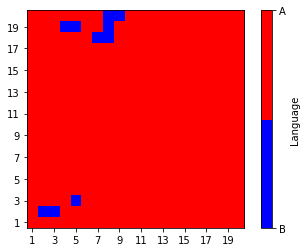

In [3]:
# Representation of the lattice final state 
figr=rep(popu)
dummy = plt.figure()
new_manager = dummy.canvas.manager
new_manager.canvas.figure = figr
figr.set_canvas(new_manager.canvas)
plt.show(figr)

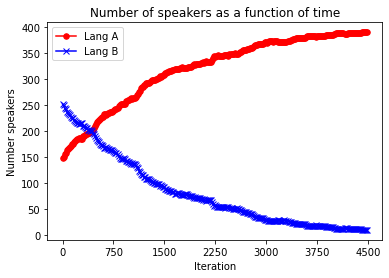

In [4]:
fig, ax = plt.subplots()
ax.plot( numsp[:,0] , c='red' , linestyle='solid', marker='o' , linewidth=1.5 , markersize=5.5 , label='Lang A')
ax.plot( numsp[:,1] , c='blue', linestyle='solid', marker='x' , linewidth=1.5 , markersize=5.5 , label='Lang B')
ax.xaxis.set_major_formatter(lambda val, pos : r'{}'.format(int(val)*mult) )
ax.set( xlabel='Iteration' , ylabel='Number speakers' , title='Number of speakers as a function of time')
ax.legend(loc='upper left')

As expected, the less renowned language tends to disappear. Fewer people speak this language as time goes by. The number of individuals speaking the language with more prestige increases with time. Even starting in a less favorable situation (the language A being less spoken), the importance (or influence) of this language over the other is sufficient to overcome this circumstance and become the principal preference among the speakers (how quickly this language dominates over the other depends on the parameter $s$). 